# K - Nearest Neighbors (KNN)

### Euclidean Distance

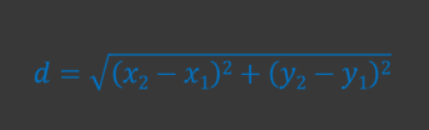

In [1]:
import numpy as np

In [2]:
# consider two points with 2 dimensions
p1 = (1,1)
p2 = (2,2)

In [3]:
# calculating Euclidean Distance 

dist = (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2

euclidean_dist = np.sqrt(dist)
print(euclidean_dist)

1.4142135623730951


In [4]:
# consider two points with 3 dimensions
p1 = (1,1,1)
p2 = (2,2,2)

# calculating Euclidean Distance 

dist = (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 + (p1[2] - p2[2])**2

euclidean_dist = np.sqrt(dist)
print(euclidean_dist)

1.7320508075688772


In [5]:
# consider two points with 4 dimensions
p1 = (1,1,1,1)
p2 = (2,2,2,2)

dist = 0

for i in range(len(p1)):
    dist = dist + (p1[i] - p2[i])**2

euclidean_dist = np.sqrt(dist)
print(euclidean_dist)

2.0


In [6]:
def get_euclidean_distance(p1, p2):
    
    dist = 0
    
    for i in range(len(p1)):
        dist = dist + (p1[i] - p2[i])**2
        
    eucledian_dist = np.sqrt(dist)
    print(eucledian_dist)

In [7]:
get_euclidean_distance((1,1,1), (2,2,2))

1.7320508075688772


### Manhattan Distance

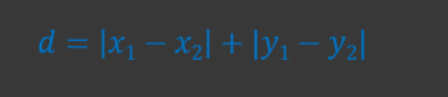

In [8]:
def get_manhattan_distance(p1, p2):
    
    dist = 0
    
    for i in range(len(p1)):
        dist = dist + abs(p1[i] - p2[i])
        
        manhattan_dist = dist
        
    print(manhattan_dist)

In [9]:
get_manhattan_distance((1,1,1,1),(2,2,2,2))

4


In [10]:
# abs --> absolute value
print(abs(1-2))

1


In [11]:
# distance between two similar data points

print(get_euclidean_distance((63,1,3,145,233,1,0,150,0,2.3,0,0,1),(37,1,2,130,250,0,1,187,0,3.5,0,0,2)))
print(get_manhattan_distance((63,1,3,145,233,1,0,150,0,2.3,0,0,1),(37,1,2,130,250,0,1,187,0,3.5,0,0,2)))

50.640300157088326
None
100.2
None


In [12]:
# distance between two dissimilar data points

print(get_euclidean_distance((63,1,3,145,233,1,0,150,0,2.3,0,0,1),(67,1,0,160,286,0,0,108,1,1.5,1,3,2)))
print(get_manhattan_distance((63,1,3,145,233,1,0,150,0,2.3,0,0,1),(67,1,0,160,286,0,0,108,1,1.5,1,3,2)))

69.54595602908914
None
124.8
None


## KNN

In [13]:
import numpy as np
import statistics

In [14]:
class KNN_Classifier():
    
    def __init__(self, distance_metric):
        
        self.distance_metric = distance_metric
        
    
    def get_distance_metric(self, training_data_point, test_data_point):
        
        if (self.distance_metric == 'euclidean'):
            
            dist = 0
            for i in range(len(training_data_point) - 1):
                dist = dist + (training_data_point[i] - test_data_point[i])**2

            euclidean_dist = np.sqrt(dist)
    
            return euclidean_dist
    
        
        elif (self.distance_metric == 'manhattan'):
            
            dist = 0
            for i in range(len(training_data_point) - 1):
                dist = dist + abs(training_data_point[i] - test_data_point[i])
                
            manhattan_dist = dist
            
            return manhattan_dist
        
        
    # getting the nearest neighbors
    def nearest_neighbors(self, X_train, test_data, k):
        
        distance_list = []
        
        for training_data in X_train:
            
            distance = self.get_distance_metric(training_data, test_data)
            distance_list.append((training_data, distance))
            
        distance_list.sort(key = lambda x: x[1])
        
        neighbors_list = []
        
        for j in range(k):
            neighbors_list.append(distance_list[j][0])
            
        return neighbors_list
    
    
    def predict(self, X_train, test_data, k):
        neighbors = self.nearest_neighbors(X_train, test_data, k)
        
        for data in neighbors:
            label = []
            label.append(data[-1])
            
        predicted_class = statistics.mode(label)
        
        return predicted_class

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
diabetes_dataset = pd.read_csv('diabetes.csv')
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
diabetes_dataset.shape

(768, 9)

In [18]:
X = diabetes_dataset.drop(columns='Outcome', axis = 1)
Y = diabetes_dataset['Outcome']

In [19]:
# converting the data to numpy array
X = X.to_numpy()
Y = Y.to_numpy()

In [20]:
print(X)
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [23]:
print(X_train)

[[0.00e+00 1.19e+02 0.00e+00 ... 3.24e+01 1.41e-01 2.40e+01]
 [6.00e+00 1.05e+02 7.00e+01 ... 3.08e+01 1.22e-01 3.70e+01]
 [1.00e+00 1.89e+02 6.00e+01 ... 3.01e+01 3.98e-01 5.90e+01]
 ...
 [1.10e+01 8.50e+01 7.40e+01 ... 3.01e+01 3.00e-01 3.50e+01]
 [4.00e+00 1.12e+02 7.80e+01 ... 3.94e+01 2.36e-01 3.80e+01]
 [0.00e+00 8.60e+01 6.80e+01 ... 3.58e+01 2.38e-01 2.50e+01]]


In [24]:
X_train = np.insert(X_train, 8, Y_train, axis=1)

In [25]:
print(X_train)

[[0.00e+00 1.19e+02 0.00e+00 ... 1.41e-01 2.40e+01 1.00e+00]
 [6.00e+00 1.05e+02 7.00e+01 ... 1.22e-01 3.70e+01 0.00e+00]
 [1.00e+00 1.89e+02 6.00e+01 ... 3.98e-01 5.90e+01 1.00e+00]
 ...
 [1.10e+01 8.50e+01 7.40e+01 ... 3.00e-01 3.50e+01 0.00e+00]
 [4.00e+00 1.12e+02 7.80e+01 ... 2.36e-01 3.80e+01 0.00e+00]
 [0.00e+00 8.60e+01 6.80e+01 ... 2.38e-01 2.50e+01 0.00e+00]]


In [26]:
X_train.shape

(614, 9)

In [27]:
print(X_train[:,8])

[1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.

X_train --> training data with features and target

X_test --> test data without target

In [31]:
classifier = KNN_Classifier(distance_metric='euclidean')

In [32]:
prediction = classifier.predict(X_train, X_test[2], k=5)

In [33]:
print(X_test[2])

[  5.    147.     78.      0.      0.     33.7     0.218  65.   ]


In [34]:
print(Y_test[2])

0


In [35]:
print(prediction)

0.0


In [36]:
X_test.shape

(154, 8)

In [37]:
X_test_size = X_test.shape[0]
print(X_test_size)

154


In [38]:
y_pred = []

for i in range(X_test_size):
    prediction = classifier.predict(X_train, X_test[i], k = 5)
    y_pred.append(prediction)

In [39]:
print(y_pred)

[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]


In [40]:
y_true = Y_test

In [41]:
accuracy = accuracy_score(y_true, y_pred)
print(accuracy*100)

69.48051948051948


### Using SKLearn KNN

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [71]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
classifier = KNeighborsClassifier(p=1)

In [74]:
classifier.fit(X_train, Y_train)

KNeighborsClassifier(p=1)

In [75]:
y_pred = classifier.predict(X_test)

In [76]:
accuracy = accuracy_score(Y_test, y_pred)

In [77]:
print(accuracy*100)

77.92207792207793
